# Hello and welcome the MediaForce data science test
- Completing the test should take approximatly 3-4 hours. If you see that it takes longer than that, you can write down your research plan and design in pseudo code or free speech.
- If you have any questions regarding the test, please contact us at asafb@mediaforce.com or sshmuely@mediaforce.com
- We will be using the following parameters in order to grade your test:
1. A clear explanation of your process and your results
2. Clean, reusable and "easy to read" code
3. Level of data processing and machine learning methodology.
4. Creativity and innovation.

In this test you will be implementing a solution for a regression problem. We recommend that you read the full test before you begin.

 - the dataset in the csv file contains aggregated transactional data of assets in an RTB enviourment  
 
 ### variable definition:
 #### - categorical variables:  
     - publisher_id - asset label
     - tag_id - sub asset label
     - domain - site url or app serial 
     - device_os - operating system 
     - device_type - device type 
     - creative_id - ad used
     - creative_type - ad type
     - hour_category - hour cluster
     - day_category - midweek vs weekend
 
 #### - ordered variables:    
     - price_bucket - each permutation (defined by a unique combination of the categorical variables) has one or more price_buckets. price buckets are clusters of historical bid prices that were used and the events they generated(i.e .1 - .2, 5 - 10, etc)
 
 #### - event counters:
     - bids - a bid was made on an ad. 
     - impression - an ad was presented (we PAY for this event)
     - click - ad was clicked on
     - landing - user landed in a landing page
     - conversion - a lead was created by the user (we get PAID for this event 1.5 USD)
     - cost - total cost
     
------
- Your task is to create a prediction engine that will predict the best price for each permutation which is defined by the combination of the variables:
 [publisher_id,tag_id,domain,device_os,device_type,creative_id,hour_category,day_category]

 #### important notes: 
 - in the data file, each permutation can have more than 1 row (for each price bucket), while in the prediction a permutation must have one row only.
 

Before we begin, use the following cell to perform all your imports. You can use any package you choose to as long as it can be installed via pip install

In [24]:
import warnings
warnings.filterwarnings("ignore")

# write all your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

# Data exploration

 - Get to know your data. Use the following cell to show us how you get acquainted with new data and start a new project. you can feel free to add a few cells if needed.
 - please add a clear documentation to help understand your thought process. 

In [2]:
df_00 = pd.read_csv('mediaforce_ds_test_data.csv')
df_00.shape

(172898, 16)

In [3]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172898 entries, 0 to 172897
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   publisher_id   172898 non-null  int64  
 1   tag_id         172898 non-null  object 
 2   domain         172252 non-null  object 
 3   device_os      154710 non-null  object 
 4   device_type    153360 non-null  float64
 5   creative_id    172898 non-null  int64  
 6   creative_type  172898 non-null  int64  
 7   price_bucket   172898 non-null  float64
 8   hour_category  172898 non-null  int64  
 9   bids           172898 non-null  int64  
 10  impression     172898 non-null  int64  
 11  click          172898 non-null  int64  
 12  landing        172898 non-null  int64  
 13  conversion     172898 non-null  int64  
 14  cost           172897 non-null  float64
 15  day_category   172898 non-null  object 
dtypes: float64(3), int64(9), object(4)
memory usage: 21.1+ MB


In [4]:
df_00.head()

,publisher_id,tag_id,domain,device_os,device_type,creative_id,creative_type,price_bucket,hour_category,bids,impression,click,landing,conversion,cost,day_category
0,3666,69803,flipboard.com,ios,NaN,433211,1,32.0,1,11749600,4219,10243,9957,1176,109.656693,midweek
1,3666,69803,flipboard.com,ios,NaN,433211,1,32.0,1,8549173,2931,8692,8406,987,70.396943,weekend
2,3666,69803,flipboard.com,ios,NaN,433211,1,64.0,1,3643449,1270,7073,6835,787,47.943051,midweek
3,5885,hd_56010,support.weather.com,ios,NaN,152,2,2.0,1,7732867,501423,2987,2952,575,734.808053,midweek
4,3666,69803,flipboard.com,ios,NaN,433211,1,32.0,2,5197213,1583,5283,5115,568,42.480644,midweek


In [5]:
# Unique values in the dataframe
df_00.nunique()

publisher_id      2316
tag_id           18856
domain            6487
device_os           10
device_type          5
creative_id          4
creative_type        2
price_bucket        17
hour_category        2
bids              9477
impression        3313
click              190
landing            185
conversion          75
cost             63967
day_category         2
dtype: int64

In [6]:
# Null values in the dataframe
print(df_00.isnull().sum())

publisher_id         0
tag_id               0
domain             646
device_os        18188
device_type      19538
creative_id          0
creative_type        0
price_bucket         0
hour_category        0
bids                 0
impression           0
click                0
landing              0
conversion           0
cost                 1
day_category         0
dtype: int64


In [7]:
# Zero values in the dataframe
(df_00 == 0).astype(int).sum(axis=0)

publisher_id          0
tag_id                0
domain                0
device_os             0
device_type           0
creative_id           0
creative_type         0
price_bucket          0
hour_category         0
bids                  0
impression         1048
click            161990
landing          162589
conversion       170824
cost               1047
day_category          0
dtype: int64

# Visualization 
- Now it is time to present your initial understanding of the data to the product team. Please write a class for data presentation. Make sure nothing is hard coded and this is a generic class that run on any data table (and target) you feed into it. Write a seperate method for each visualization

- Use the next cell to run all the functions you have just created. If it is not self explainatory, please add an explanation.

In [ ]:
class Viz():

    def __init__(self, df):
        self.df = df

    def show_plot(self,plot_type, x_name, y_name, title):
        #plot type: 'o' - scatter plot, '-' - line plot
        plt.plot(self.df[x_name].values, self.df[y_name].values, plot_type)
        plt.title(title)
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.show()
    
    def show_hist(self, name,n_bins):
        plt.hist(self.df[name].values, bins=n_bins)
        plt.title(name)
        plt.show()

In [ ]:
df_00.columns

Index(['publisher_id', 'tag_id', 'domain', 'device_os', 'device_type',
       'creative_id', 'creative_type', 'price_bucket', 'hour_category', 'bids',
       'impression', 'click', 'landing', 'conversion', 'cost', 'day_category'],
      dtype='object')

In [ ]:
dt = Viz(df_00)

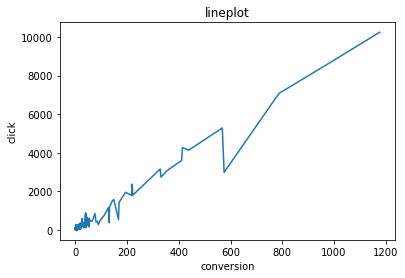

In [ ]:
dt.show_plot('-','conversion','click','lineplot')

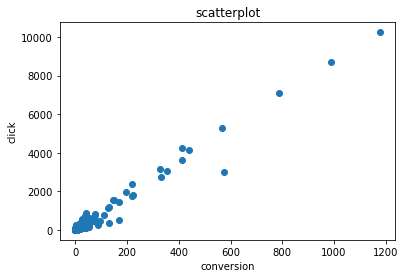

In [ ]:
dt.show_plot('o','conversion','click','scatterplot')

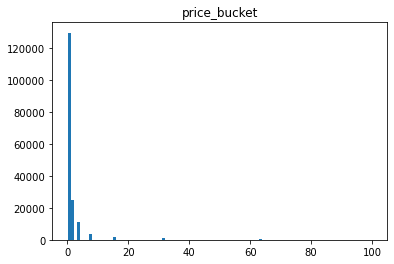

In [ ]:
dt.show_hist('price_bucket',100)

# Preprocessing
- Please write a class or script that performs all the preprocessing needed before you start creating your predictive model. Normally, we would break this process into multiple classes/scripts, but as this is a limited task, you can write a single class/function that performs all the preprocessing. 

In [8]:
def preprocessing_data(df):
    features_list= ['publisher_id','tag_id','domain','device_os','device_type','creative_id','hour_category','day_category','price_bucket',
                    'bids', 'impression', 'click', 'landing', 'conversion', 'cost']
    df = df[features_list]
    
    # Filling out NaNs
    df[['domain']] = df[['domain']].fillna(value='other')
    df[['device_os']] = df[['device_os']].fillna(value='other')
    df[['device_type']] = df[['device_type']].fillna(value=0)
    df[['cost']] = df[['cost']].fillna(value=0)
    
    # Choosing the most common occurance per permutation when switching from "long form" to "wide form"
    df = df.groupby(['tag_id']).agg(lambda x:x.value_counts().index[0]).reset_index()
    
    df =df.drop(['tag_id'],axis=1)
    
    # Grouping very small occurances
    df.loc[df['price_bucket'] >= 8.0, 'price_bucket'] = 13
    
    df.loc[df.device_os == 'chrome os', 'device_os'] = 'other'
    df.loc[df.device_os == 'gnu/linux', 'device_os'] = 'other'
    df.loc[df.device_os == 'other mobile', 'device_os'] = 'other'
    df.loc[df.device_os == 'gaming console', 'device_os'] = 'other'
    df.loc[df.device_os == 'firefox os', 'device_os'] = 'other'
    df.loc[df.device_os == 'apple ios', 'device_os'] = 'other'
    
    df.loc[df.device_type == 1.0, 'device_type'] = 0
    df.loc[df.device_type == 3.0, 'device_type'] = 0
    
    # Transforming categorical features into numeric
    object_cat_list = ['domain','device_os','day_category']
    df[object_cat_list] = df[object_cat_list].apply(LabelEncoder().fit_transform)

    
    return df

In [9]:
df_00 = pd.read_csv('mediaforce_ds_test_data.csv')
df_01 = preprocessing_data(df_00)

In [10]:
# The data is ready for modeling
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18856 entries, 0 to 18855
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   publisher_id   18856 non-null  int64  
 1   domain         18856 non-null  int64  
 2   device_os      18856 non-null  int64  
 3   device_type    18856 non-null  float64
 4   creative_id    18856 non-null  int64  
 5   hour_category  18856 non-null  int64  
 6   day_category   18856 non-null  int64  
 7   price_bucket   18856 non-null  float64
 8   bids           18856 non-null  int64  
 9   impression     18856 non-null  int64  
 10  click          18856 non-null  int64  
 11  landing        18856 non-null  int64  
 12  conversion     18856 non-null  int64  
 13  cost           18856 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 2.0 MB


# Modeling
- Use the next cell to create your model.

In [27]:
y = df_01['price_bucket']
X = df_01.drop(['price_bucket'],axis=1)
y.shape, X.shape

((18856,), (18856, 13))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((15084, 13), (3772, 13))

In [29]:
model = RandomForestRegressor(random_state=0, max_depth=10).fit(X_train,y_train)

# Present your results
- Use the next cell to perform your analysis.
- report the results and present them verbaly and graphically. 

note: here you should describe both the model validation score (how you know the model is good) and the prediction validation  score (how you know the prediction is good). 

In [14]:
def mape_vectorized_v2(y_true, prediction): 
    #solution to problem of division by 0
    mask = y_true != 0
    return (np.fabs(y_true - prediction)/y_true)[mask].mean()*100 

In [15]:
def show_regresion_error(predictions, true_values):
    df_predict = pd.DataFrame(predictions, true_values)
    df_predict = df_predict.reset_index(level=0, inplace=False)
    df_predict.columns = ['true_value', 'predictions']
    
    print("Mean squared error (test): %.3f" % mean_squared_error(true_values, predictions, squared=False))
    print("Mean absolute error (test): %.3f" %mean_absolute_error(true_values, predictions ))
    print("Mean absolute percentage error: %.3f" %mape_vectorized_v2(true_values, predictions))
    print("R2_score: %.3f" %r2_score(true_values, predictions))
    
    sns.scatterplot(data=df_predict, y='predictions', x='true_value')
    sns.lineplot(data=df_predict, x='true_value', y='true_value', color='g')

Mean squared error (test): 1.265
Mean absolute error (test): 0.466
Mean absolute percentage error: 95.801
R2_score: 0.491


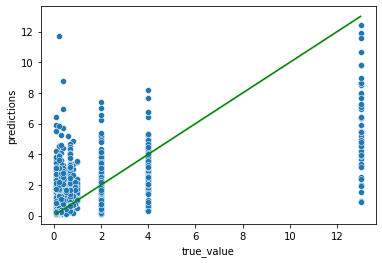

In [30]:
predictions = model.predict(X_test)
show_regresion_error(predictions, y_test)

In [31]:
#random forest
feature_importance = pd.DataFrame(model.feature_importances_, 
                             columns=['coef'], index=X.columns.tolist()) 
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.iloc[:,:]

,coef
cost,0.472304
bids,0.138032
impression,0.129771
domain,0.096289
publisher_id,0.088014
device_os,0.020483
device_type,0.016269
creative_id,0.008518
day_category,0.008288
click,0.007606


In [23]:
# testing Grid Search:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [25]:
# Manually stopped after 30 minutes of runtime.
grid_cv = GridSearchCV(model, param_grid, cv=5)
grid_cv.fit(X_train,y_train)
print("Best Hyperparameters::\n{}".format(grid_cv.best_params_))

In [18]:
feature_importance_list = feature_importance[feature_importance['coef'] >= 0.1].index.tolist()
print(feature_importance_list)

['cost', 'bids', 'impression', 'domain', 'publisher_id']


Mean squared error (test): 1.251
Mean absolute error (test): 0.459
Mean absolute percentage error: 90.923
R2_score: 0.503


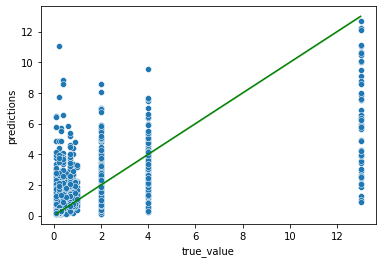

In [19]:
# Testing model #2, with the most influential features:
model_2 = RandomForestRegressor(random_state=0).fit(X_train[feature_importance_list],y_train)
predictions = model_2.predict(X_test[feature_importance_list])
show_regresion_error(predictions, y_test)

In [20]:
X_train.columns

Index(['publisher_id', 'domain', 'device_os', 'device_type', 'creative_id',
       'hour_category', 'day_category', 'bids', 'impression', 'click',
       'landing', 'conversion', 'cost'],
      dtype='object')

In [21]:
feature_list = ['bids', 'impression', 'click',
       'landing', 'conversion', 'cost']

Mean squared error (test): 1.359
Mean absolute error (test): 0.499
Mean absolute percentage error: 98.873
R2_score: 0.413


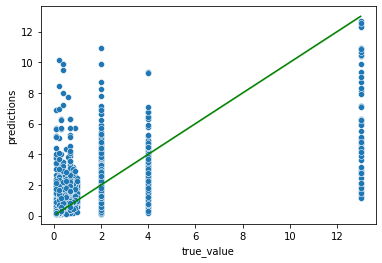

In [22]:
# Test #3, only numeric features:
model_3 = RandomForestRegressor(random_state=0).fit(X_train[feature_list],y_train)
predictions = model_3.predict(X_test[feature_list])
show_regresion_error(predictions, y_test)

# Best of luck - The MediaForce Data Science team

The results weren't very good, but I'm guessing that wasn't the point of this exercize. 

* I have divided the data to train and test (20%), the model learned only from the train set and i want to see similar results for the chosen metric on both sets.


I could have significally improved the prediction validation score (MSE), with:

1) More extensive EDA

2) Feature engineering

3) Testing Grid Search (manually stopped after 30 minutes of runtime)

4) Testing out other models (XGBoost, LGBM and others)

5) Cross Validation

6) Testing out other encoders for cat. features

But for lack of time, I skipped those. 


More data (the train data [one line for each permutation] was very small) could have also significally improve the results.